# ***STOCK PRICE FORECASTING***

## ***Problem Statement***

**The aim of this project is to develop an accurate forecasting model for stock data, enabling investors and traders to make informed decisions and optimize their investment strategies. The challenge lies in predicting the future prices of stocks with high precision, given the inherent complexity and volatility of financial markets.**

**The forecasting model must address several key aspects. First, it should consider historical stock data, including price trends, trading volumes, and various technical indicators, to capture the underlying patterns and relationships. Second, the model must account for market factors, such as economic indicators, news sentiment, and industry-specific events, which can significantly impact stock prices. Third, it should adapt to changing market conditions and incorporate real-time data for timely predictions.**

**The forecasting model should employ advanced machine learning techniques, such as deep learning algorithms, time series analysis, and ensemble methods, to handle the non-linear and dynamic nature of stock data. Additionally, it should provide probabilistic forecasts, indicating the uncertainty associated with each prediction.**

**The successful development of an accurate stock forecasting model will empower investors with reliable insights, reducing risks, and improving their financial decision-making processes.**

### ***Objective***

**1: Develop a robust forecasting model that accurately predicts stock prices based on historical data, technical indicators, and market factors.**

**2: Incorporate real-time data into the forecasting model to adapt to changing market conditions and improve the timeliness of predictions.**

**3: Provide probabilistic forecasts that quantify the uncertainty associated with each prediction, enhancing risk management and decision-making capabilities for investors and traders.**

### ***Constraints***

**1: Limited Historical and Real-time Data Availability - Accessing reliable and comprehensive historical and real-time stock data may be challenging, impacting the accuracy and scope of the forecasting model.**

**2: Computational Resource Limitations - Developing and deploying advanced forecasting models may require significant computational power and resources, potentially limiting scalability and implementation efficiency.**

**3: Regulatory and Ethical Compliance - The project must adhere to legal and ethical guidelines, including data privacy regulations, ensuring that the use of financial data aligns with industry standards and protects user privacy.**

# ***Importing Necessary Libraries and Loading the data set into datafram***

In [ ]:
# installing necessary packages
# !pip install mplfinance
# !pip install pmdarima

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math
from scipy import stats
import matplotlib.dates as mdates
from plotly import tools
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

init_notebook_mode(connected=True)
%matplotlib inline
# matplotlib defaults
plt.style.use("fivethirtyeight")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import mplfinance as mpf
# from fbprophet import Prophet
# from prophet.plot import plot_plotly, add_changepoints_to_plot
import pmdarima as pm
from pmdarima.arima.utils import ndiffs

In [ ]:
# loading the data set into pandas dataframe

df = pd.read_csv('all_stocks_5yr.csv')

In [ ]:
# first 5 rows of the data set
df.head()

date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [ ]:
# displaying the last 5 rows of the dataset
df.tail()

date   open   high    low  close   volume Name
619035  2018-02-01  76.84  78.27  76.69  77.82  2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78  2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83  2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27  4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86  4534912  ZTS

# ***Exploratory Data Anlaysis (EDA) & Data Cleaning***

**Let's understand more about the data**

In [ ]:
# printing the shape of the dataset
df.shape

(619040, 7)

**The pair of numbers "(619040, 7)" typically refers to the shape of a dataset in the context of data analysis or machine learning. The first number, 619040, represents the number of rows or observations in the dataset, while the second number, 7, represents the number of columns or variables/features in the dataset.**

**In this case, the dataset has 619040 rows or observations, indicating that there are 619040 instances or data points. The dataset also has 7 columns or variables/features, suggesting that there are 7 different attributes or measurements associated with each data point.**

**The shape of a dataset provides important information about its structure and dimensionality, allowing analysts and researchers to understand the size and composition of the data before performing any analysis or modeling tasks.**

In [ ]:
# printing the feature names of the dataframe
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

**Each element in the list represents the name of a column or variable in the dataset. Here's an explanation of each column:**

**1. 'date': This column likely contains the date or timestamp associated with each data point. It represents the specific time or period for which the other variables are recorded.**

**2. 'open': This column represents the opening price of a stock or financial instrument at the given date. It indicates the price at which trading began for that particular period.**

**3. 'high': This column represents the highest price reached by a stock or financial instrument during the given date. It indicates the peak value achieved within the recorded time frame.**

**4. 'low': This column represents the lowest price reached by a stock or financial instrument during the given date. It indicates the minimum value observed within the recorded time frame.**

**5. 'close': This column represents the closing price of a stock or financial instrument at the given date. It indicates the price at which trading concluded for that particular period.**

**6. 'volume': This column represents the trading volume, i.e., the number of shares or contracts traded for the given stock or financial instrument on the specified date. It indicates the level of market activity.**

**7. 'Name': This column might represent the name or identifier of the stock or financial instrument associated with the recorded data. It helps distinguish data from different stocks or instruments if the dataset includes multiple entities.**

**The 'dtype='object'' indicates that the data type of each column is considered as an object, which could indicate that the values in those columns are strings or a mixture of different types.**

In [ ]:
# Let's get the information regarding the data
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 619040 entries, 0 to 619039

Data columns (total 7 columns):

 #   Column  Non-Null Count   Dtype  

---  ------  --------------   -----  

 0   date    619040 non-null  object 

 1   open    619029 non-null  float64

 2   high    619032 non-null  float64

 3   low     619032 non-null  float64

 4   close   619040 non-null  float64

 5   volume  619040 non-null  int64  

 6   Name    619040 non-null  object 

dtypes: float64(4), int64(1), object(2)

memory usage: 33.1+ MB


**The output represents a DataFrame with 619,040 rows and 7 columns. It provides information about the data type and non-null counts for each column, indicating that the DataFrame contains four float columns, one integer column, and two object columns. The DataFrame consumes approximately 33.1 MB of memory.**

In [ ]:
# checking of null values in the dataframe
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

**The output provided represents the count of missing values (NaN or null) in each column of a DataFrame. For instance, the 'open' column has 11 missing values, indicating that there are 11 rows where the opening price is not available. Similarly, the 'high' and 'low' columns have 8 missing values each, indicating the absence of recorded data for the highest and lowest prices in 8 rows. On the other hand, the 'date', 'close', 'volume', and 'Name' columns have 0 missing values, indicating that all rows in these columns contain valid data. The 'dtype: int64' specifies that the count values are represented as integers.**

In [ ]:
# rename Name to ticks
rdf = df.rename(columns={'name':'ticks'})

# drop the null as they a few values and time-series won't be affected by such values
rdf.dropna(inplace=True)

# change the dtype of date column
new_df = rdf.copy()
new_df.loc[:, 'date'] = pd.to_datetime(rdf.loc[:, 'date'], format='%Y/%m/%d')

# new dataframe info
new_df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 619029 entries, 0 to 619039

Data columns (total 7 columns):

 #   Column  Non-Null Count   Dtype         

---  ------  --------------   -----         

 0   date    619029 non-null  datetime64[ns]

 1   open    619029 non-null  float64       

 2   high    619029 non-null  float64       

 3   low     619029 non-null  float64       

 4   close   619029 non-null  float64       

 5   volume  619029 non-null  int64         

 6   ticks   619029 non-null  object        

dtypes: datetime64[ns](1), float64(4), int64(1), object(1)

memory usage: 37.8+ MB


### **Top 10 stock tickers by average trade volume**

In [ ]:
# find the average volume of each stocks using function and sort top 10 most traded stocks for further analysis
mean_dict = {}

# find average of volume traded over a period of time using for loops
for key in new_df['ticks'].unique():
    value = new_df[new_df['ticks'] == key ]['volume'].mean()
    mean_dict[key]= value

print("Length of the mean of ticks dictionary:", len(mean_dict))

# convert dict to pandas dataframe
avaerage_s = pd.Series(mean_dict).transpose()
top10_s = avaerage_s.sort_values(ascending=False)[:10]

print("Top 10 company tickers with highest average traded stock volume:\n", top10_s.index)

Length of the mean of ticks dictionary: 505

Top 10 company tickers with highest average traded stock volume:

 Index(['BAC', 'AAPL', 'GE', 'F', 'FB', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO'], dtype='object')


In [ ]:
# function to return top 10 sub dataframe
def subdataframe(df, tick):

    # top 10 ticks
    ticks = list(top10_s.index)

    assert tick in ticks, """Stock tick does not belong to top 10 stocks by trade volume, please try any of these:\n
    ['BAC', 'AAPL', 'GE', 'F', 'FB', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO']"""

    ndf = new_df[new_df['ticks'] == tick]
    return ndf

In [ ]:
# company dict for respective ticks (TOP 10 STOCKS BY AVERAGE TRAE VOLUME)
company_dict = {'BAC':'Bank of America',
                'AAPL':'Apple',
                'GE':'General Electric',
                'F':'Ford Motor Company',
                'FB':'Facebook',
                'MSFT':'Microsoft',
                'AMD':'Adavanced Micro Devices',
                'MU':'Micron Technology',
                'INTC':'Intel Corp',
                'CSCO':'Cisco'
               }

bac_df = subdataframe(new_df, 'BAC')
aapl_df = subdataframe(new_df, 'AAPL')
ge_df = subdataframe(new_df, 'GE')
f_df = subdataframe(new_df, 'F')
fb_df = subdataframe(new_df, 'FB')
msft_df = subdataframe(new_df, 'MSFT')
amd_df = subdataframe(new_df, 'AMD')
mu_df = subdataframe(new_df, 'MU')
intc_df = subdataframe(new_df, 'INTC')
csco_df = subdataframe(new_df, 'CSCO')

In [ ]:
# define a function to return daily return and company column
def dailyfunc(df):
    df['daily return'] = ((df['close'] - df['open'])/df['open'])*100
    df.style.format('{:.2f}%', subset='daily return')
    df['daily_mean'] = (df['open'] + df['close'] + df['high'] + df['low'])/4
    df['co_name'] = company_dict[df['ticks'].unique()[0]]
    return df

bac_df = dailyfunc(bac_df)
aapl_df = dailyfunc(aapl_df)
ge_df = dailyfunc(ge_df)
f_df = dailyfunc(f_df)
fb_df = dailyfunc(fb_df)
msft_df = dailyfunc(msft_df)
amd_df = dailyfunc(amd_df)
mu_df = dailyfunc(mu_df)
intc_df = dailyfunc(intc_df)
csco_df = dailyfunc(csco_df)

print('\t\tStart Date\t\t\t\t\tEnd Date')
print(f"BAC\t\t{bac_df['date'].min()}\t\t\t{bac_df['date'].max()}")
print(f"AAPL\t\t{aapl_df['date'].min()}\t\t\t{aapl_df['date'].max()}")
print(f"GE\t\t{ge_df['date'].min()}\t\t\t{ge_df['date'].max()}")
print(f"F\t\t{f_df['date'].min()}\t\t\t{f_df['date'].max()}")
print(f"FB\t\t{fb_df['date'].min()}\t\t\t{fb_df['date'].max()}")
print(f"MSFT\t\t{msft_df['date'].min()}\t\t\t{msft_df['date'].max()}")
print(f"AMD\t\t{amd_df['date'].min()}\t\t\t{amd_df['date'].max()}")
print(f"MU\t\t{mu_df['date'].min()}\t\t\t{mu_df['date'].max()}")
print(f"INTC\t\t{intc_df['date'].min()}\t\t\t{intc_df['date'].max()}")
print(f"CSCO\t\t{csco_df['date'].min()}\t\t\t{csco_df['date'].max()}")


		Start Date					End Date

BAC		2013-02-08 00:00:00			2018-02-07 00:00:00

AAPL		2013-02-08 00:00:00			2018-02-07 00:00:00

GE		2013-02-08 00:00:00			2018-02-07 00:00:00

F		2013-02-08 00:00:00			2018-02-07 00:00:00

FB		2013-02-08 00:00:00			2018-02-07 00:00:00

MSFT		2013-02-08 00:00:00			2018-02-07 00:00:00

AMD		2013-02-08 00:00:00			2018-02-07 00:00:00

MU		2013-02-08 00:00:00			2018-02-07 00:00:00

INTC		2013-02-08 00:00:00			2018-02-07 00:00:00

CSCO		2013-02-08 00:00:00			2018-02-07 00:00:00


### **Closing stock price visualizations & maximum price during 5 years**

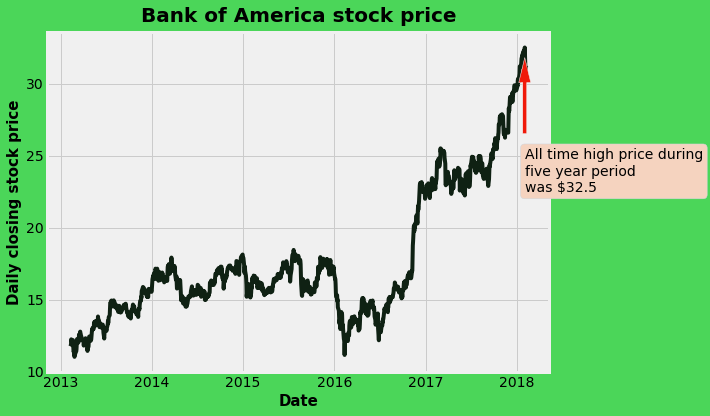

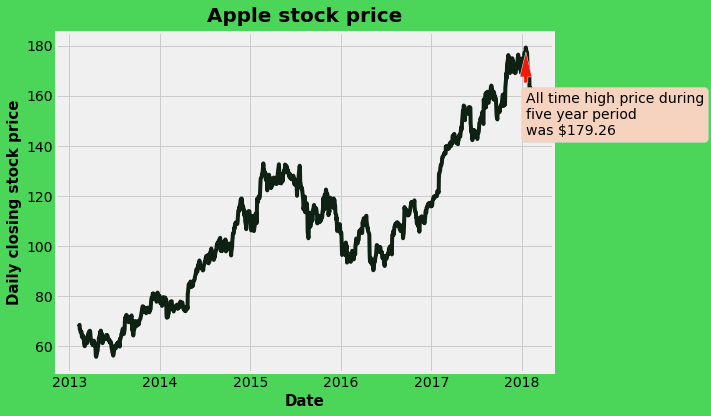

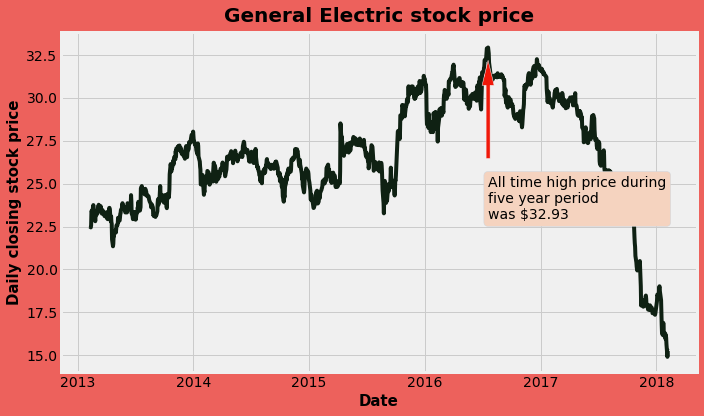

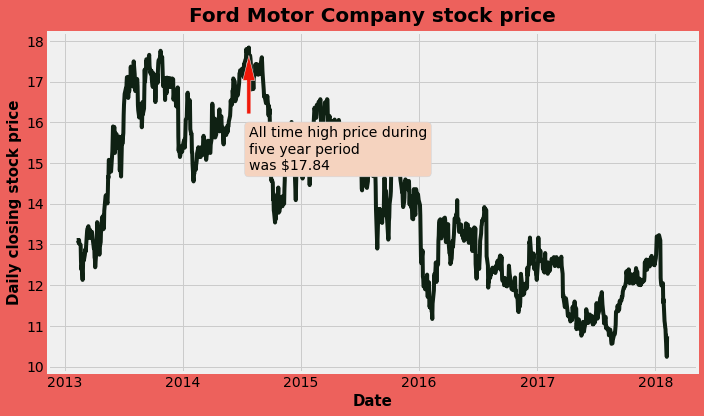

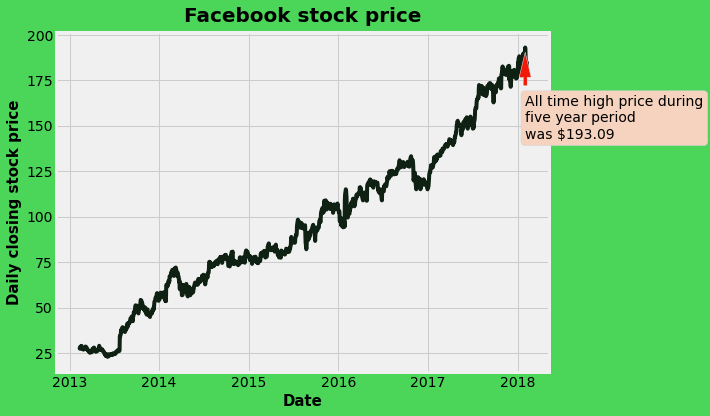

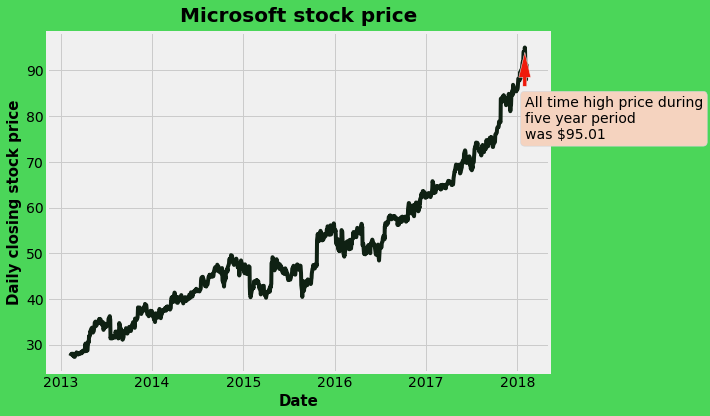

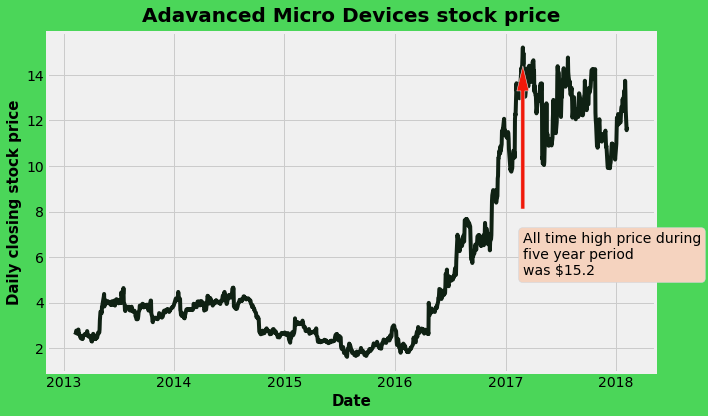

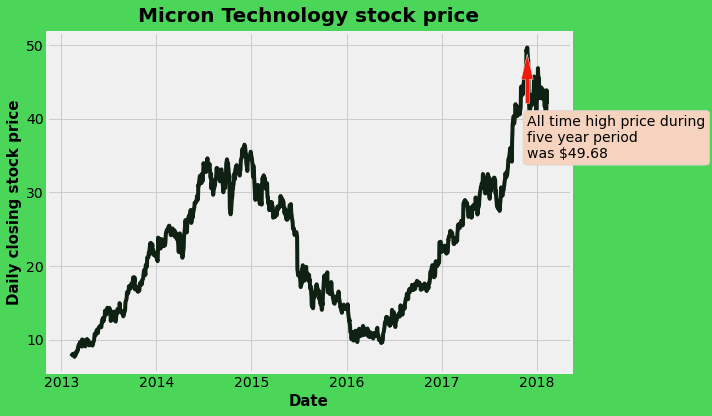

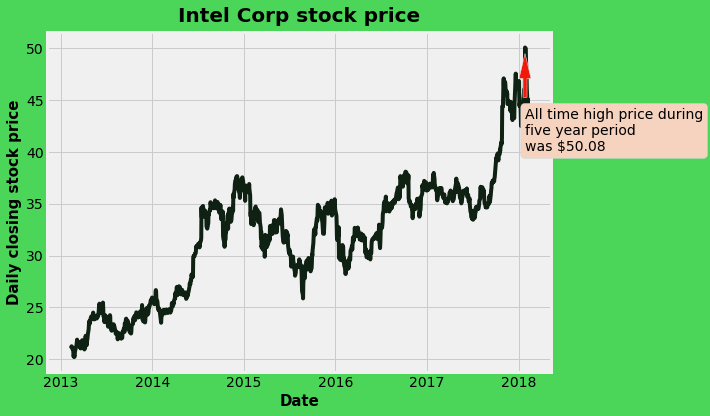

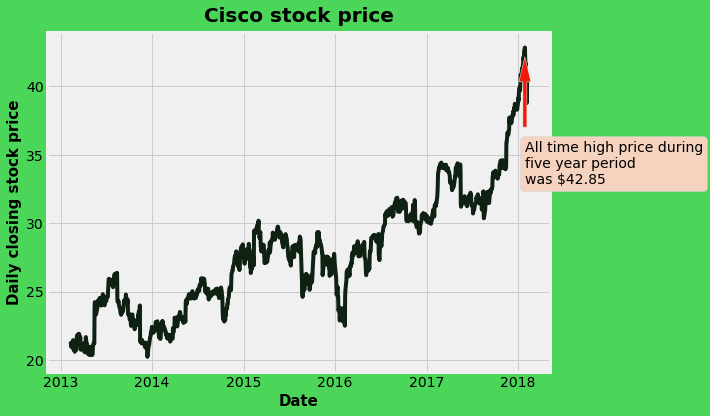

In [ ]:
# function return closing stock price over a 5 years of time period
def closing_stock_price(df):

    # define highest stock over 5 period of time with date of the same
    high = df['close'].max()
    datetime = df[df['close'] == df['close'].max()]['date'].values

    if df['ticks'].unique()[0] == 'GE':
        fig, ax = plt.subplots(figsize=(10,6), facecolor='#ed615c')
    elif df['ticks'].unique()[0] == 'F':
        fig, ax = plt.subplots(figsize=(10,6), facecolor='#ed615c')
    else:
        fig, ax = plt.subplots(figsize=(10,6), facecolor='#4bd659')
    ax.plot(df['date'], df['close'], color='#0f2113')
    ax.set_title(f"{df['co_name'].unique()[0]} stock price", fontsize=20)
    ax.set_xlabel("Date", fontsize=15)
    ax.set_ylabel("Daily closing stock price", fontsize=15)
    if df['ticks'].unique()[0] == 'AAPL':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-35),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df['ticks'].unique()[0] == 'F':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-3),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df['ticks'].unique()[0] == 'FB':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-50),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df['ticks'].unique()[0] == 'MSFT':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-20),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df['ticks'].unique()[0] == 'MU':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-15),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    else:
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-10),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))

    plt.show()

# plot of all the closing stocks
closing_stock_price(bac_df)
closing_stock_price(aapl_df)
closing_stock_price(ge_df)
closing_stock_price(f_df)
closing_stock_price(fb_df)
closing_stock_price(msft_df)
closing_stock_price(amd_df)
closing_stock_price(mu_df)
closing_stock_price(intc_df)
closing_stock_price(csco_df)

**1. We could find TOP 10 most traded stocks duing period of 2013-2018.**

**2. Out of 10 companies one is bank, 7 of them are tech companies, another two are non-tech lagacy companies namely General electric and Ford motors.**

**3. From closing stock price visualization, we can learn that stocks 'GE' and 'F' are declining and other tech stocks are rising over a five year period time.**

**4. As we can see visualizations are self-explanatory and we can learn all time high stock prices of all the tickers.**

### **Trade volume of stocks over a period of 2013-2018**

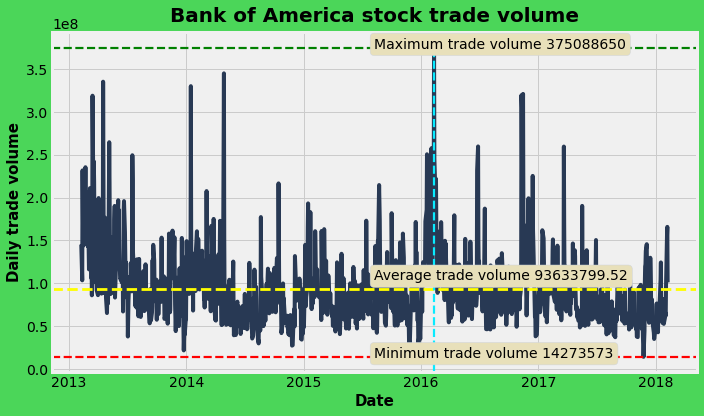

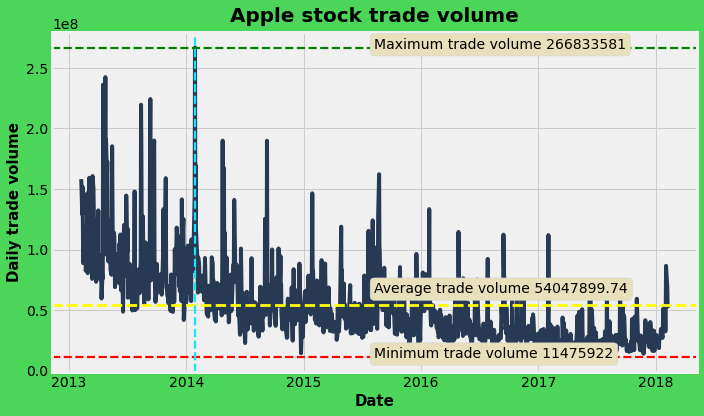

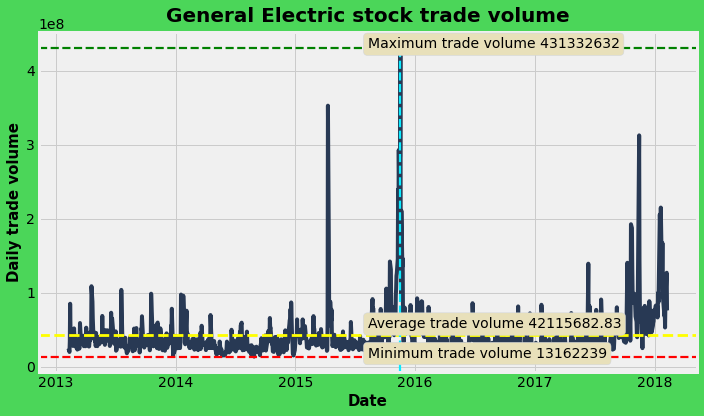

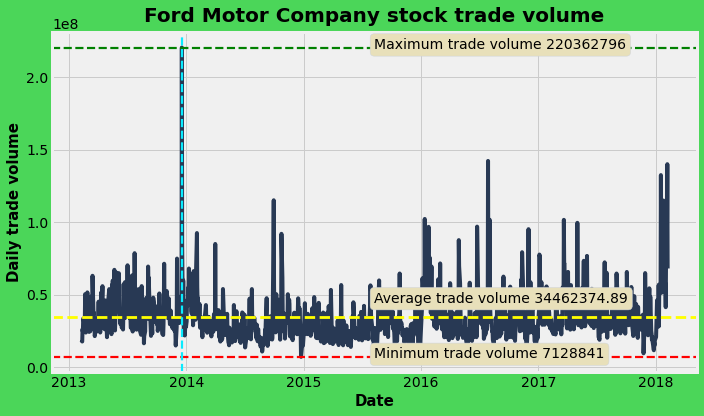

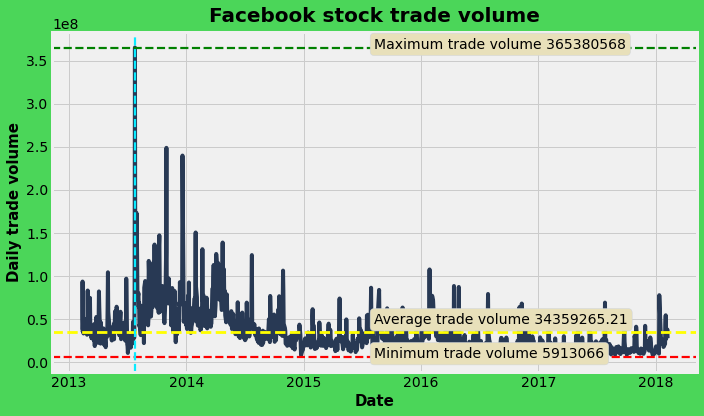

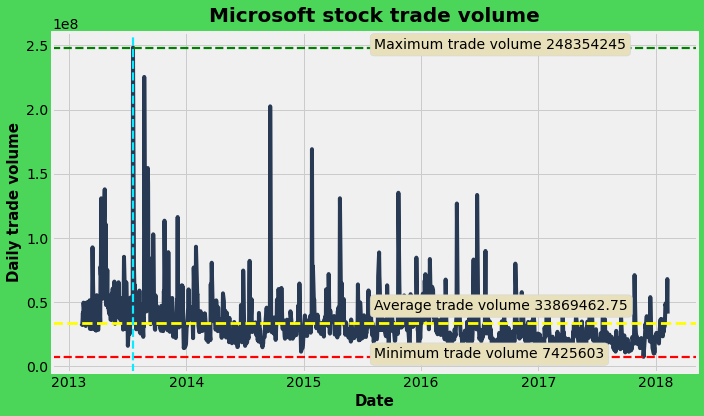

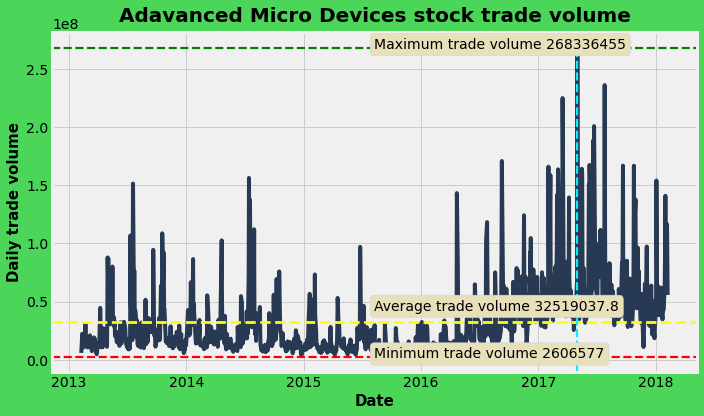

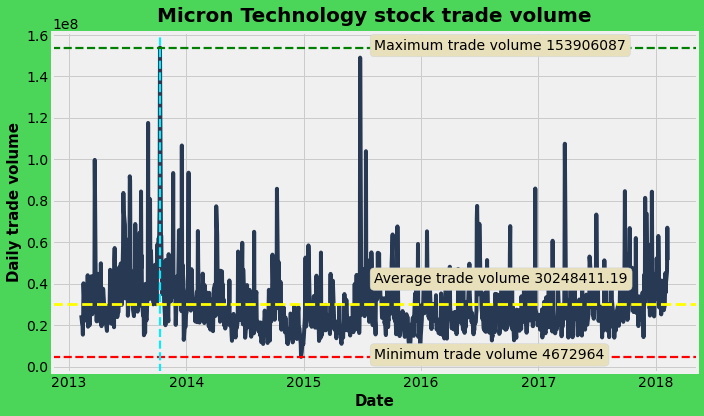

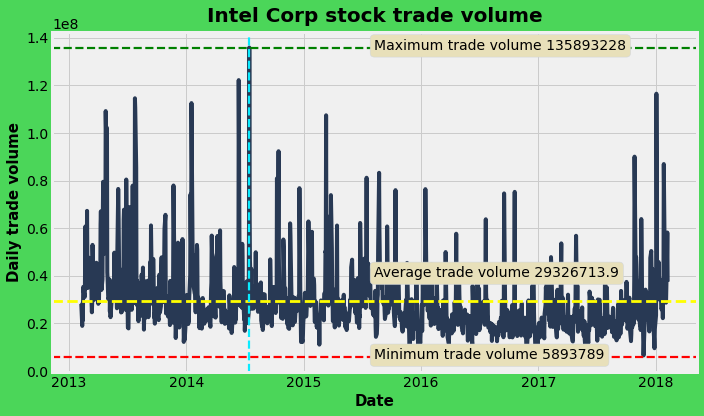

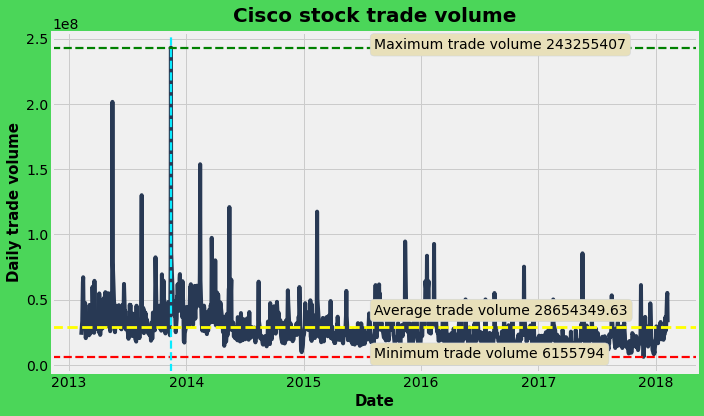

In [ ]:
# function to visualize trade volume of stocks
def trade_vol(df):

    # x and y coords for average trade volume
    ave_x = df['date'].mean()
    ave_y = df['volume'].mean()
    # y coord for max trade vol
    max_y = df['volume'].max()
    # y coord for min trade vol
    min_y = df['volume'].min()

    fig, ax = plt.subplots(figsize=(10,6), facecolor='#4bd659')
    ax.plot(df['date'], df['volume'], color='#283954')
    ax.set_title(f"{df['co_name'].unique()[0]} stock trade volume", fontsize=20)
    ax.set_xlabel("Date", fontsize=15)
    ax.set_ylabel("Daily trade volume", fontsize=15)
    ax.axhline(y=df['volume'].max(), linestyle='--', lw=2.2, color='green')
    ax.axhline(y=df['volume'].min(), linestyle='--',lw=2.2, color='red')
    ax.axhline(y=df['volume'].mean(), linestyle='--',lw=2.8, color='yellow')
    ax.axvline(x=df[df['volume'] == max_y]['date'].values, ls='--', lw='2.2', color='#0aebff')
    ax.annotate(f"Average trade volume {round(df['volume'].mean(),2)}",
                xy=(ave_x,ave_y),xytext=(ave_x,ave_y + 10000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
    ax.annotate(f"Maximum trade volume {df['volume'].max()}",
                xy=(ave_x,max_y),xytext=(ave_x,max_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
    ax.annotate(f"Minimum trade volume {df['volume'].min()}",
                xy=(ave_x,min_y),xytext=(ave_x,min_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )

    plt.show()


# plot of all stocks trade volume
trade_vol(bac_df)
trade_vol(aapl_df)
trade_vol(ge_df)
trade_vol(f_df)
trade_vol(fb_df)
trade_vol(msft_df)
trade_vol(amd_df)
trade_vol(mu_df)
trade_vol(intc_df)
trade_vol(csco_df)

**Observations:**

**1. Above visualizations depicts what was the maximum, minimum and average trade volume overa period of 2013-2018.**

**2. As visualizations are self-explanatory in nature we can also learn variance of trade volume for example stock ticker 'INTC' has a higest variance in trade volume compared other tickers.**

###**Comparative analysis of 7 tech stocks**

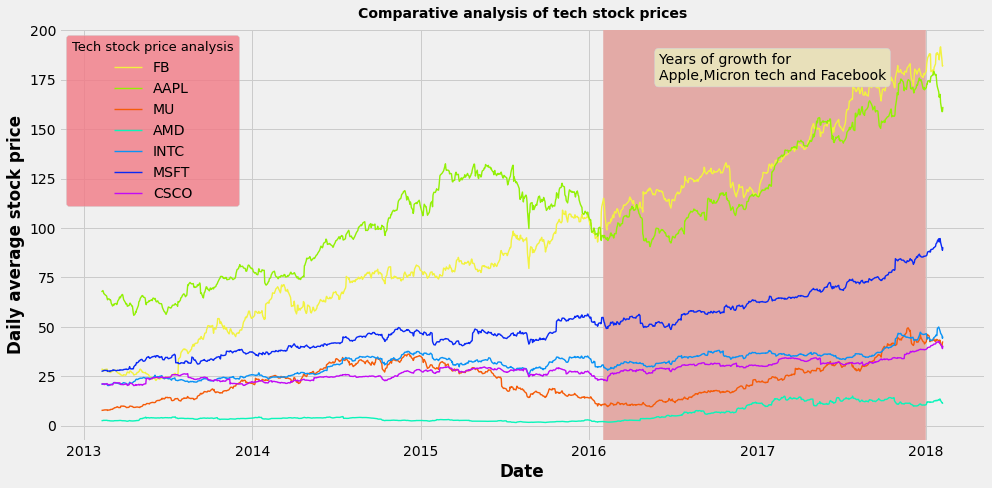

In [ ]:
# tech stocks price comparison
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(fb_df['date'], fb_df['daily_mean'],label='FB', color='#f2f23f', lw=1.4)
ax.plot(aapl_df['date'], aapl_df['daily_mean'],label='AAPL', color='#92f005', lw=1.4)
ax.plot(mu_df['date'], mu_df['daily_mean'],label='MU', color='#f55c0a', lw=1.4)
ax.plot(amd_df['date'], amd_df['daily_mean'],label='AMD', color='#0af5ba', lw=1.4)
ax.plot(intc_df['date'], intc_df['daily_mean'],label='INTC', color='#0a93f5', lw=1.4)
ax.plot(msft_df['date'], msft_df['daily_mean'],label='MSFT', color='#0a29f5', lw=1.4)
ax.plot(csco_df['date'], csco_df['daily_mean'],label='CSCO', color='#c20af5', lw=1.4)
ax.axvspan(*mdates.datestr2num(['2/1/2016','12/31/2017']), color='#e3aaa6')
ax.set_title("Comparative analysis of tech stock prices")
ax.annotate("Years of growth for\nApple,Micron tech and Facebook", xy=(mdates.datestr2num('6/1/2016'),175),
           bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'))
ax.set_xlabel("Date")
ax.set_ylabel("Daily average stock price")
ax.legend(facecolor='#f27985', fontsize="medium", title="Tech stock price analysis", title_fontsize=13)

plt.show()

**Observations**

**1. It is very clear that 'FB' stock was one of the most expensive among all 7 tech stocks**

**2. stock ticker 'AMD' was among the cheapest to buy compared to other stocks**

**3. From above chart we can also conclude that stocks like 'FB' and 'AAPL' were also among the most volatile in nature than other stocks**

### **Find out growth of stocks of the companies over a 5 years period**

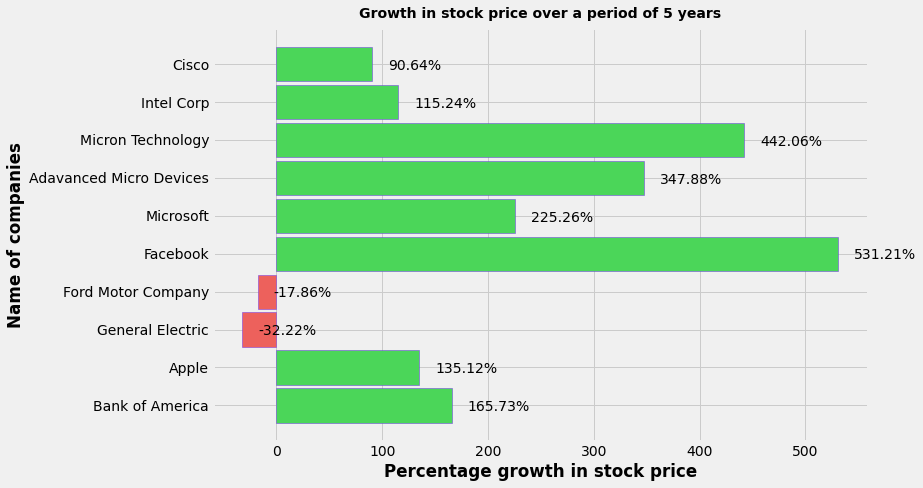

In [ ]:
# list of stock dataframes
list_df = [bac_df, aapl_df, ge_df, f_df, fb_df, msft_df, amd_df, mu_df, intc_df, csco_df]

# loop through the the list_df to find mini and maxi of each stocks
mini = [df[df['date'] == df['date'].min()]['close'].values.item() for df in list_df]
maxi = [df[df['date'] == df['date'].max()]['close'].values.item() for df in list_df]

# find list of abosolute difference between both stock price
diff = np.array(maxi) - np.array(mini)

# find the percentage growth
growth = (diff/mini)*100
growth_list = growth.tolist()
co_name_list = [df['co_name'].unique()[0] for df in list_df]

# visualize the growth of the stocks
fig, ax = plt.subplots(figsize=(13,7))
ax.barh(y=co_name_list, width=growth_list, height=0.9, color=['#4bd659','#4bd659','#ed615c','#ed615c','#4bd659',
                                                             '#4bd659','#4bd659','#4bd659','#4bd659','#4bd659'],
       edgecolor='#713ae8')
for p in ax.patches:
    ax.annotate(f'{round(p.get_width(),2)}%', (p.get_width()+15, p.get_y() +0.3))
ax.set_xlabel('Percentage growth in stock price')
ax.set_ylabel('Name of companies')
ax.set_title("Growth in stock price over a period of 5 years")
plt.show()

**Observations**

**1. We can observe that growth of stock 'Facebook' is the highest among all other 10 stocks over a period of 5 years**

**2. It is very much self-explanotary that stocks of 'Ford Motors' and 'General Electric' has given negative return over a years of period.**

### **Daily return of stock prices analysis**

**Daily return hypothesis test**

  **1. In stock market, you will often hear that daily return of any stock price is 0% which means you will get zero return on your investment in one day.**
  **2. So let's prove the hypothesis by analysing top 10 most traded stocks and assesing their daily return distribution in this section**

  **3. H0: Daily return is zero**

  **4. Ha: Daily return is not zero**

  **5. We will prove this hypothesis as a one sample t-test as we know population mean but are not aware of std deviation. if p-value is greater than 0.05 than we can not reject the null hypothesis and if it is less than 0.05 than we have to reject the null hypothesis**

In [ ]:
# python's scipy.stats module has ttest_1samp method we allows to prove this hypothesis
result_dict = {}
for df in list_df:
    result = stats.ttest_1samp(df['daily return'], 0)
    result_dict[df['ticks'].unique()[0]] = result
result_dict

{'BAC': Ttest_1sampResult(statistic=-0.3532776176429947, pvalue=0.7239395130534507),
 'AAPL': Ttest_1sampResult(statistic=0.41429430560560754, pvalue=0.6787292124343915),
 'GE': Ttest_1sampResult(statistic=-0.6899014787481069, pvalue=0.490383391591772),
 'F': Ttest_1sampResult(statistic=-1.829967497402379, pvalue=0.06749132535767648),
 'FB': Ttest_1sampResult(statistic=0.4317992311745167, pvalue=0.665961331814306),
 'MSFT': Ttest_1sampResult(statistic=2.936864998172622, pvalue=0.00337582087561039),
 'AMD': Ttest_1sampResult(statistic=0.5320769266138294, pvalue=0.5947666691710993),
 'MU': Ttest_1sampResult(statistic=-0.39122335657215007, pvalue=0.6956983959552627),
 'INTC': Ttest_1sampResult(statistic=3.0472693720373076, pvalue=0.002357434011831407),
 'CSCO': Ttest_1sampResult(statistic=2.689287118677755, pvalue=0.007255138945761937)}

**1. From above results, we can learn that pvalues of stocks 'MSFT'.'INTC' and 'CSCO' are less than 0.05 so we can reject the null hypothesis and accept alternative hypothesis that is 'Daily return is not zero' while for other stocks we cannot reject null hypothesis.**

**2. Stistically it proves that 7 out of 10 have daily return of zero percentage which is the most general case.**

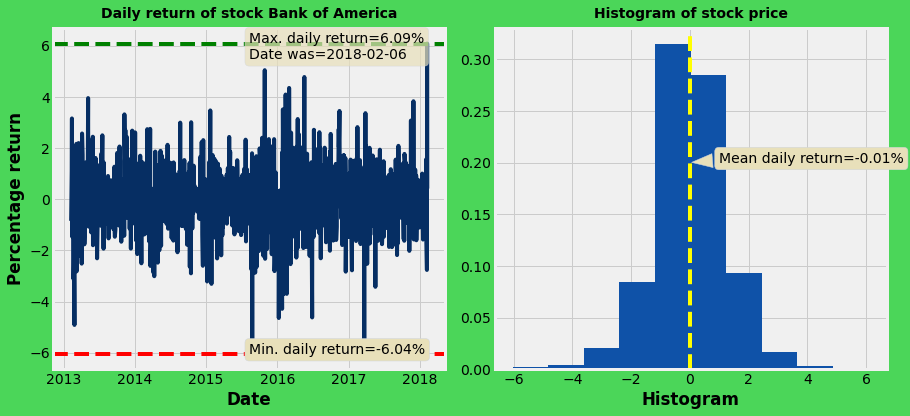

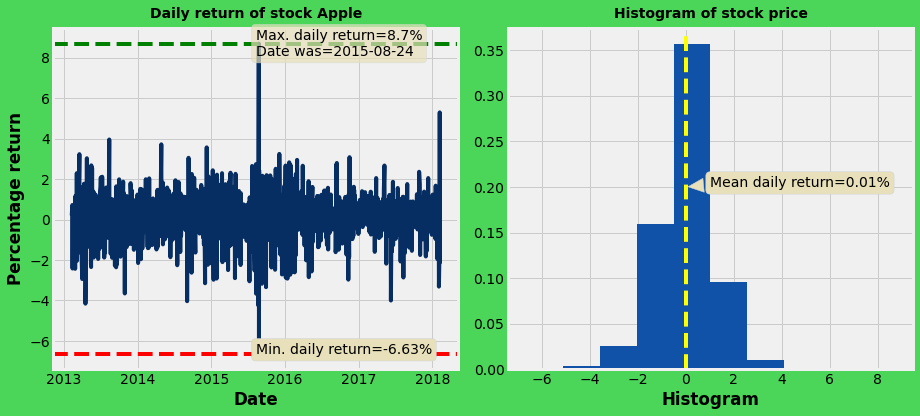

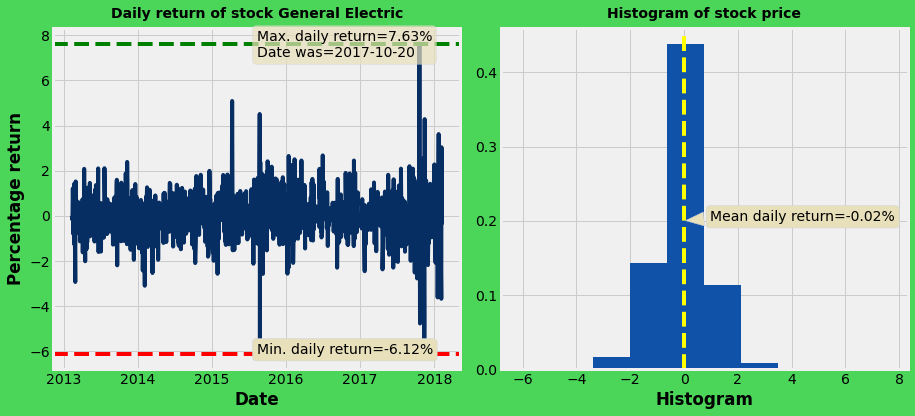

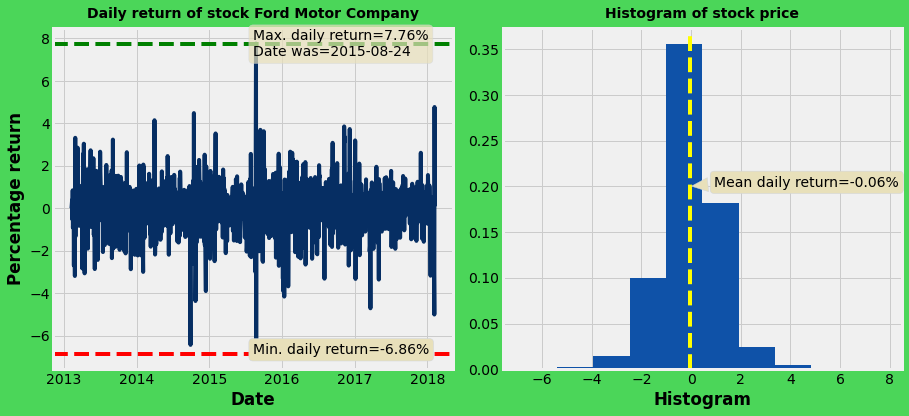

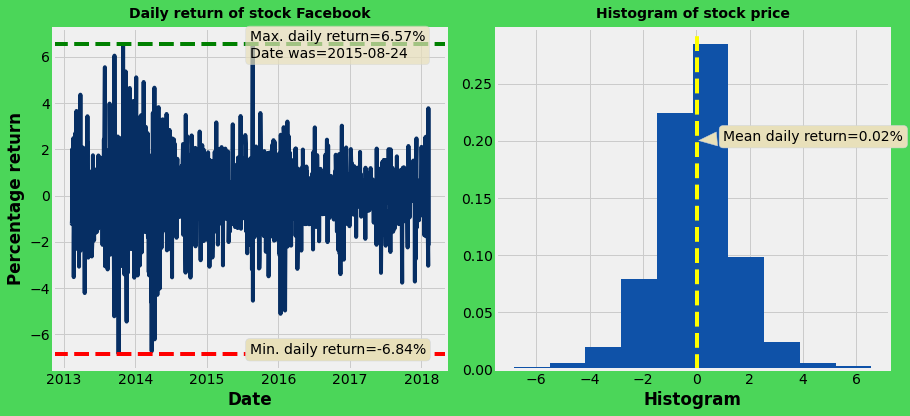

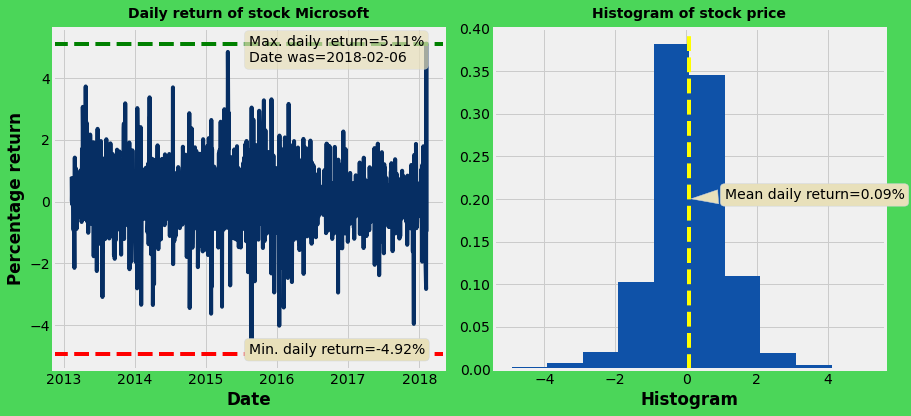

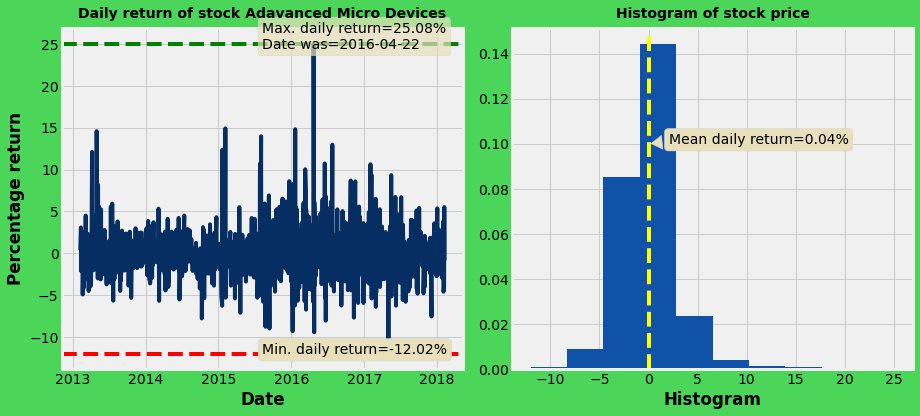

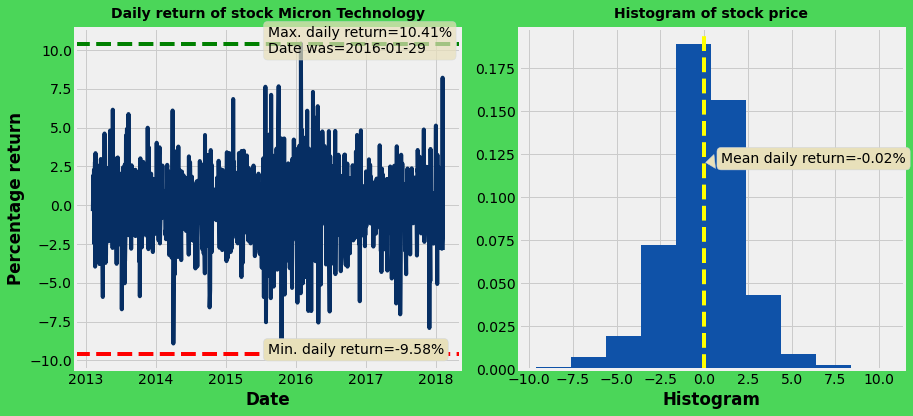

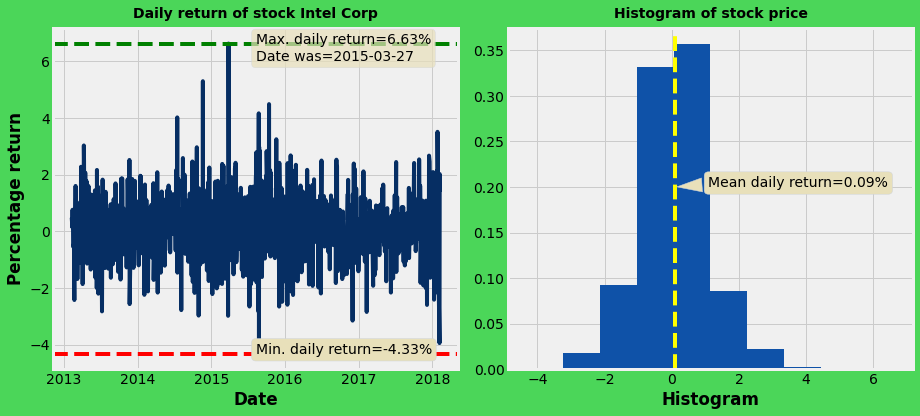

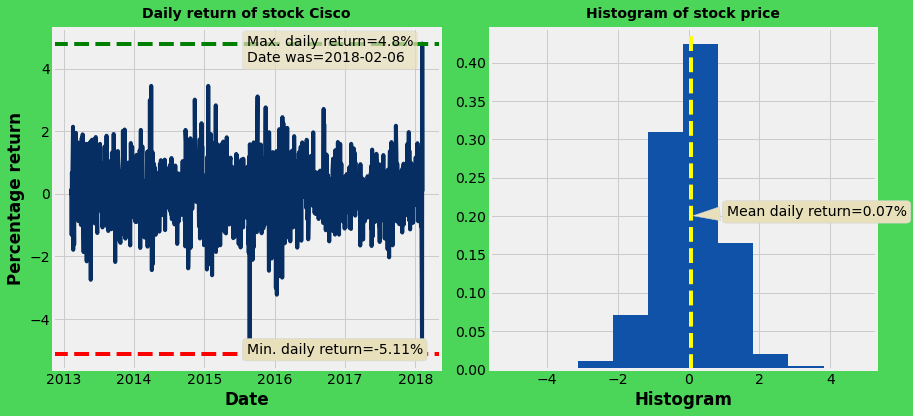

In [ ]:
###### function to plot daily return and histogram of 10 stocks
def daily_return(df):

    # assign variables to annotation positions
    ave_x = df['date'].mean()
    y_max = df['daily return'].max()
    y_max_date = df[df['daily return'] == df['daily return'].max()]['date'].values
    dt = pd.to_datetime(y_max_date, '%Y%m%d%H%M%S')
    xb = dt.item().date()
    y_min = df['daily return'].min()
    y_mean = df['daily return'].mean()

    plt.figure(figsize=(13,6), facecolor='#4bd659')

    plt.subplot(121)
    plt.plot(df['date'], df['daily return'], color='#062e63')
    plt.axhline(y=df['daily return'].max(), color='green', ls='--')
    plt.axhline(y=df['daily return'].min(), color='red', ls='--')
    plt.xlabel('Date')
    plt.ylabel("Percentage return")
    plt.annotate(f"Min. daily return={round(df['daily return'].min(),2)}%",
                xy=(ave_x,y_min),xytext=(ave_x,y_min),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
    plt.annotate(f"Max. daily return={round(df['daily return'].max(),2)}%\nDate was={xb}",
                xy=(ave_x,y_max),xytext=(ave_x,y_max-0.6),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db', alpha=0.7)
                 )
    plt.title(f"Daily return of stock {df['co_name'].unique()[0]}")

    plt.subplot(122)
    plt.hist(df['daily return'], density=True, color='#0f52a8')
    plt.xlabel('Histogram')
    plt.axvline(x=df['daily return'].mean(), color='yellow', ls='--')
    if df['ticks'].unique()[0] == 'AMD':
        plt.annotate(f"Mean daily return={round(df['daily return'].mean(),2)}%",
                xy=(y_mean,0.10),xytext=(y_mean+2,0.10),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'),
                arrowprops=dict(arrowstyle="wedge,tail_width=1.",facecolor='#e8e0ba',
                            edgecolor='#d0d5db',
                            relpos=(0.1,0.5)
                            )
                 )
    elif df['ticks'].unique()[0] == 'MU':
        plt.annotate(f"Mean daily return={round(df['daily return'].mean(),2)}%",
                xy=(y_mean,0.12),xytext=(y_mean+1,0.12),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'),
                arrowprops=dict(arrowstyle="wedge,tail_width=1.",facecolor='#e8e0ba',
                            edgecolor='#d0d5db',
                            relpos=(0.1,0.5)
                            )
                 )
    else:
        plt.annotate(f"Mean daily return={round(df['daily return'].mean(),2)}%",
                xy=(y_mean,0.20),xytext=(y_mean+1,0.20),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'),
                arrowprops=dict(arrowstyle="wedge,tail_width=1.",facecolor='#e8e0ba',
                            edgecolor='#d0d5db',
                            relpos=(0.1,0.5)
                            )
                 )
    plt.title(f"Histogram of stock price")

    plt.show()

# call the function with dataframe
daily_return(bac_df)
daily_return(aapl_df)
daily_return(ge_df)
daily_return(f_df)
daily_return(fb_df)
daily_return(msft_df)
daily_return(amd_df)
daily_return(mu_df)
daily_return(intc_df)
daily_return(csco_df)

### **Technical analysis of stocks using candle stick charts and moving average**


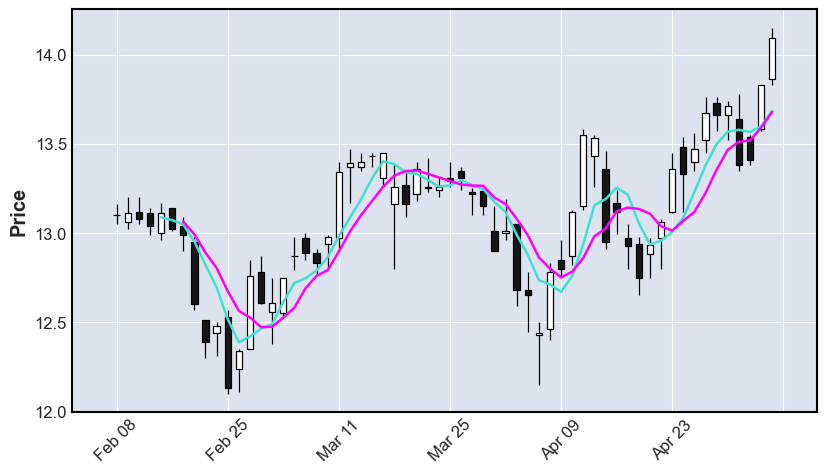

In [ ]:
# using matplotlib/mplfinance tool
F_df = f_df.copy()
F_df.set_index('date', inplace=True)
F_df
mpf.plot(F_df.iloc[:60,:], type='candle', mav=(5,7), figratio=(9,5))

### **Candlestick charts of stocks to visualize OHLC prices**

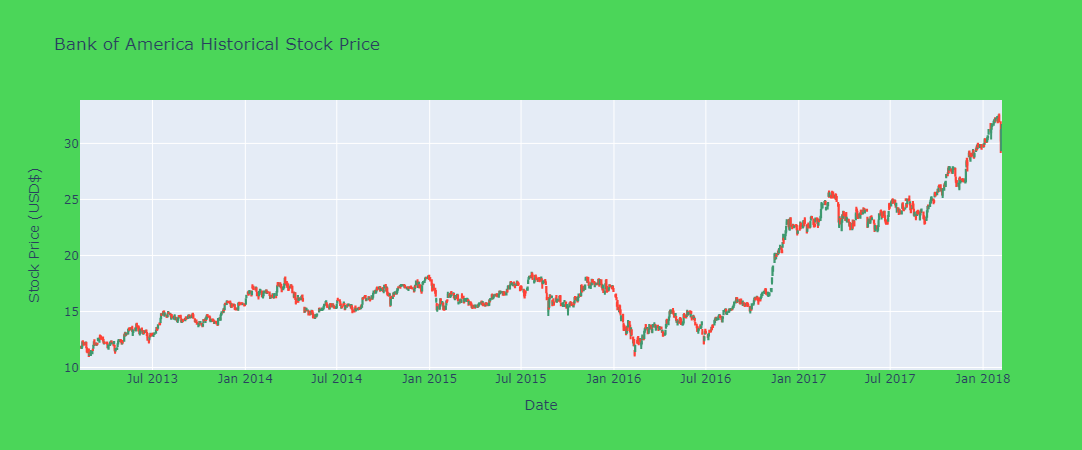

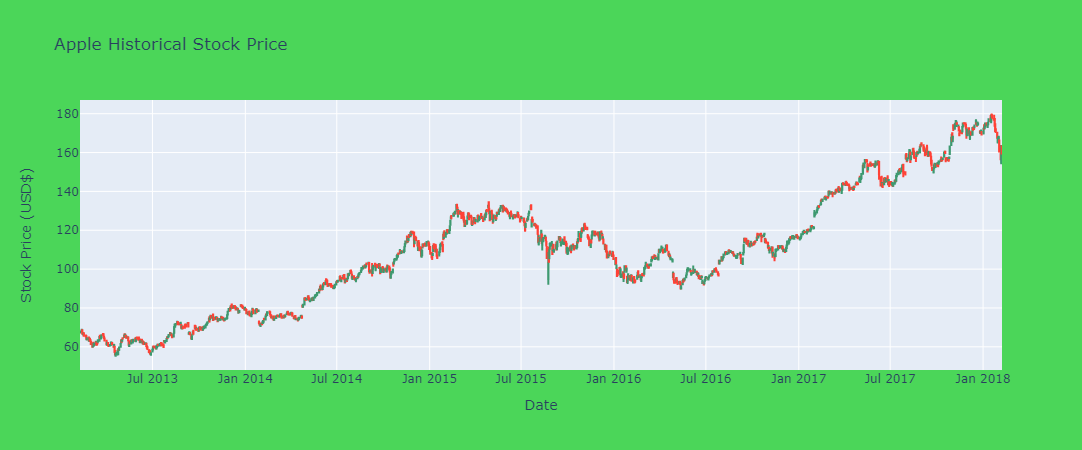

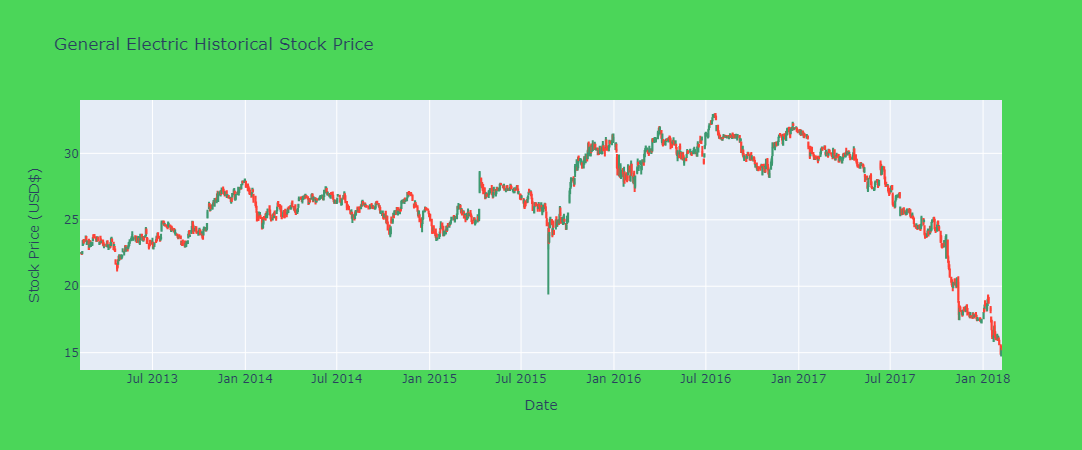

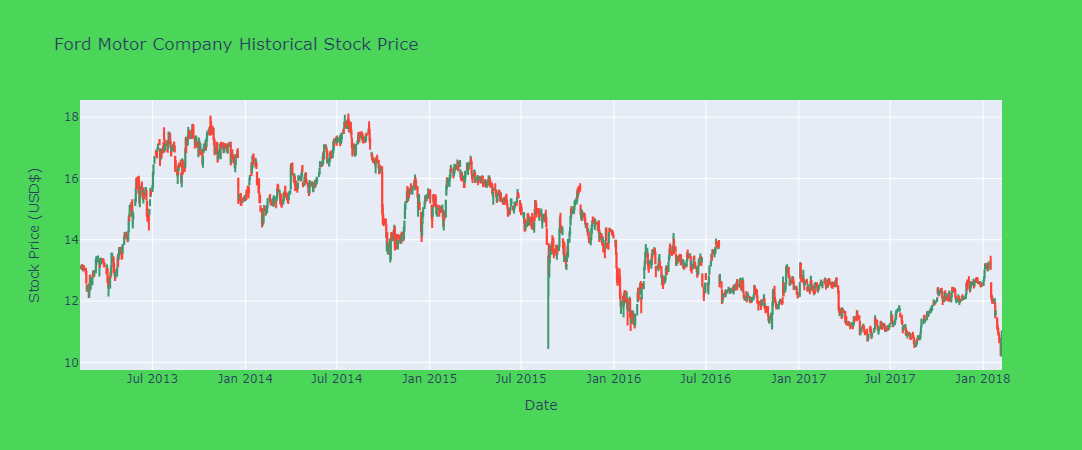

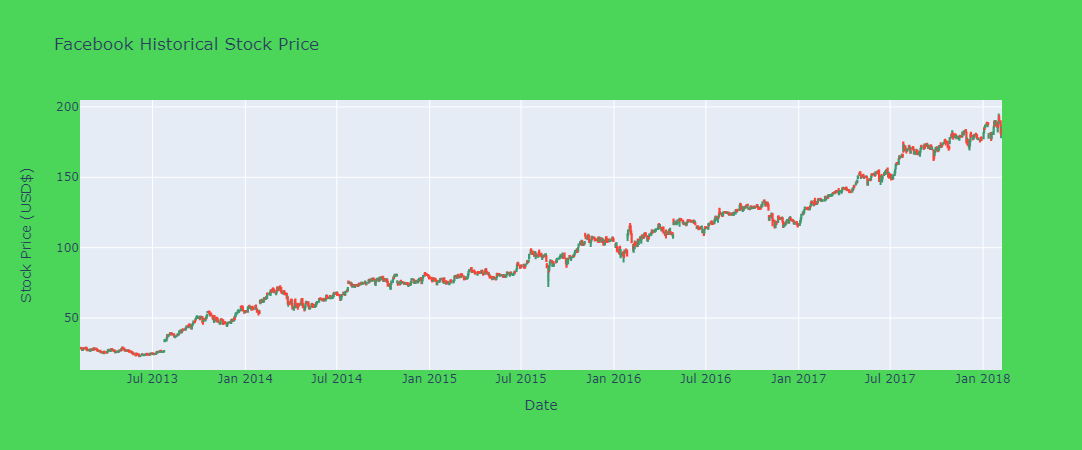

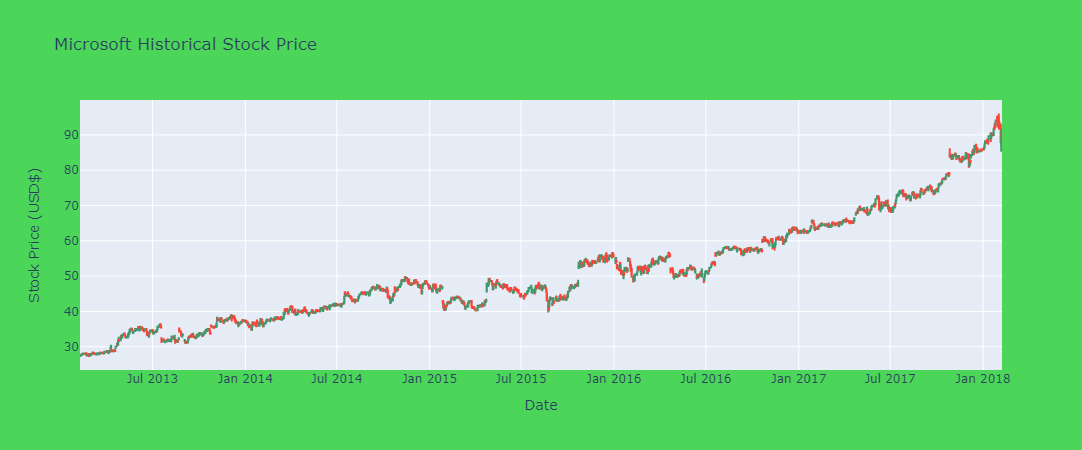

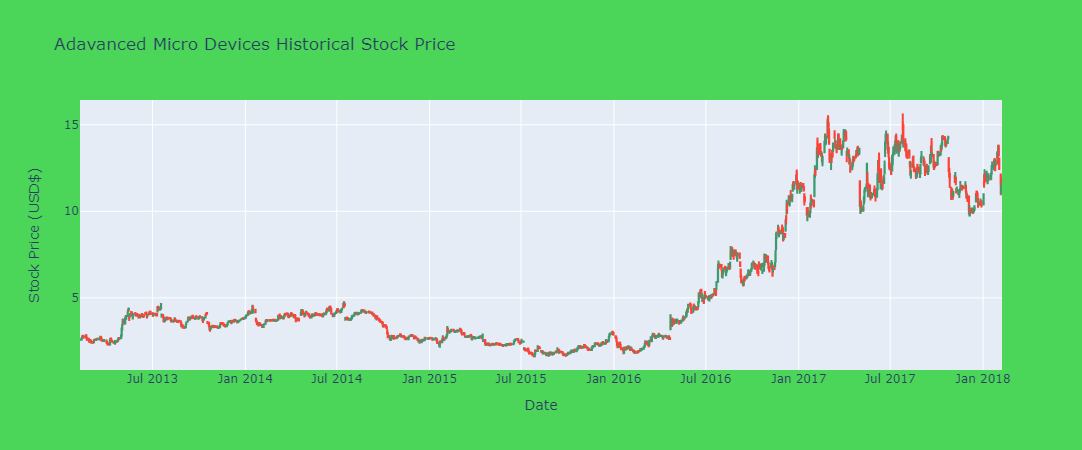

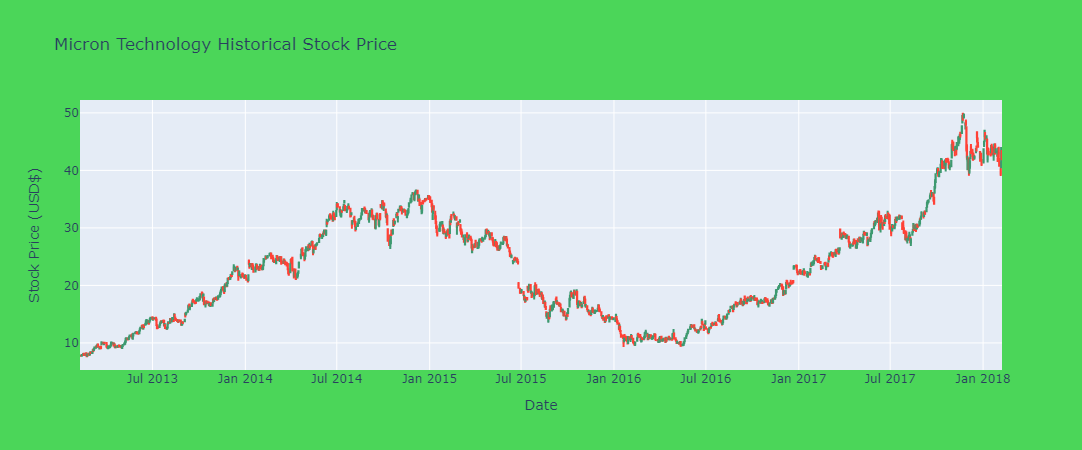

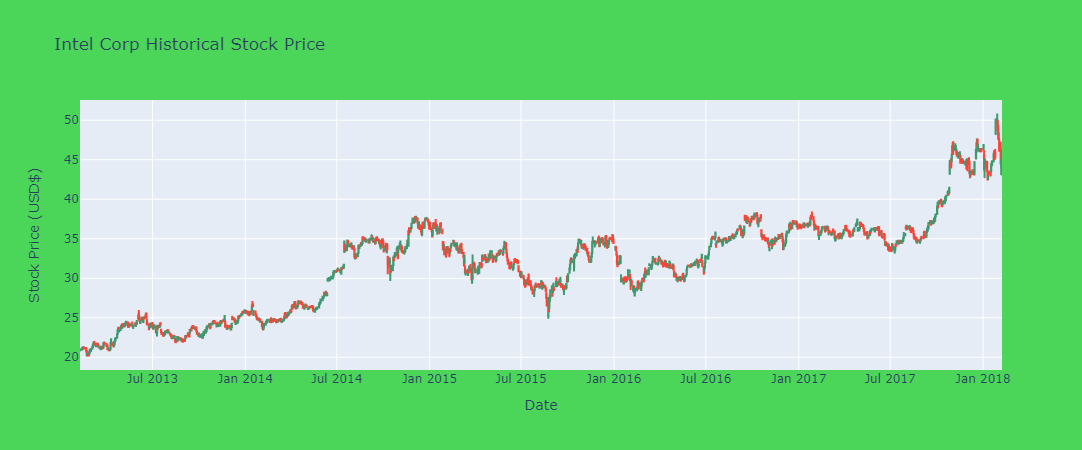

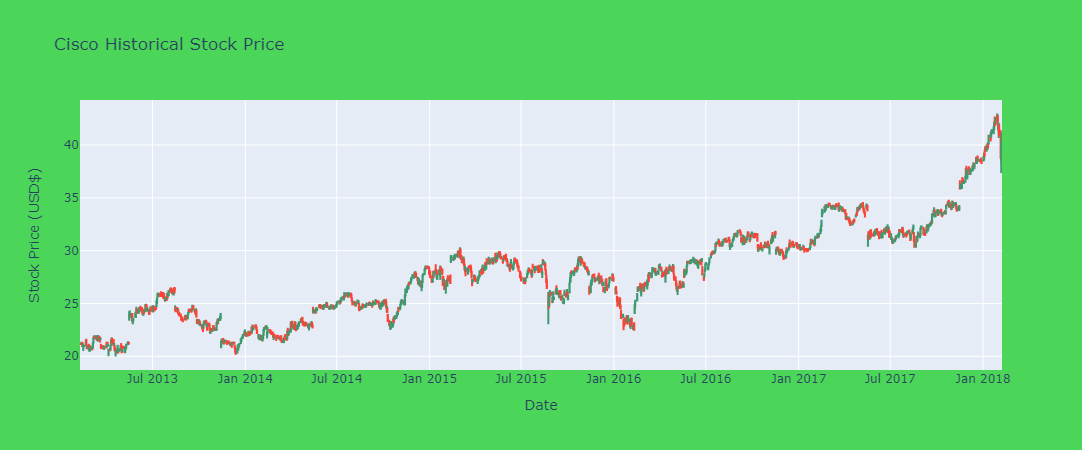

In [ ]:
# using plotly graph_objs let's plot candlestick charts of stocks
def candlestick_chart(df):
    trace = go.Candlestick(x=df['date'],
                          open=df['open'],
                          high=df['high'],
                          low=df['low'],
                          close=df['close'])
    layout ={
    'title': f"{df['co_name'].unique()[0]} Historical Stock Price",
    'xaxis': {'title': 'Date'
             },
    'yaxis': {'title': 'Stock Price (USD$)'}
}


    data = [trace]

    fig = go.Figure(data=data, layout=layout)
    fig.update_layout(xaxis_rangeslider_visible=False, paper_bgcolor='#4bd659')
    fig.show()

# plot the charts using this function
candlestick_chart(bac_df)
candlestick_chart(aapl_df)
candlestick_chart(ge_df)
candlestick_chart(f_df)
candlestick_chart(fb_df)
candlestick_chart(msft_df)
candlestick_chart(amd_df)
candlestick_chart(mu_df)
candlestick_chart(intc_df)
candlestick_chart(csco_df)

### **Moving Averages charts of Facebook and Apple**

**Moving average of stocks**

**A moving average (MA) is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price. A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates a downtrend.**

**Moving average is one of the most widly used stock market forecasting method in finance industry, in this section we will plot and analyse stocks of 'FACEBOOK' and 'APPLE' using 10, 50 and 200 days moving averages to find uptrend and downtrends**

In [ ]:
# define function to return copies of stock dataframe with moving averages
def mav_function(df):

    # calclulate moving averages of 10,50 and 200 days
    df['10_d_avg'] = df['close'].rolling(window=10).mean()
    df['50_d_avg'] = df['close'].rolling(window=50).mean()
    df['200_d_avg'] = df['close'].rolling(window=200).mean()

    return df

# let's analyse apple and facebook stocks using moving averages methods
aapl_df = mav_function(aapl_df)
fb_df = mav_function(fb_df)

In [ ]:
# plot moving avearges charts of apple and facebook
aapl_dfn = aapl_df.copy()
fb_dfn = fb_df.copy()

def mav_chart(df):
    df = df.set_index('date')

    fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True)
    # set colors and cols names to be plotted
    colors = ['#ff4500', '#92a1cf', '#6E6E6E']
    avgs = ['10_d_avg','50_d_avg','200_d_avg']

    for col, c in zip(avgs, colors):
        fig.append_trace({'x': df.index, 'y': df[col], 'type': 'scatter', 'name': col, 'line': {'color': c}},1,1)
    for col in ['close']:
        fig.append_trace({'x': df.index, 'y': df[col], 'type': 'scatter', 'name': 'closing price', 'line': {'color': '#393f5e'}},2,1)

    fig['layout'].update(height=800,title=f"Relationship between Moving averages <br> and Closing Price of {df['co_name'].unique()[0]}",
                    paper_bgcolor='#4bd659', plot_bgcolor='#F2DFCE')
    fig.show()

**Moving average chart of 'FB'**

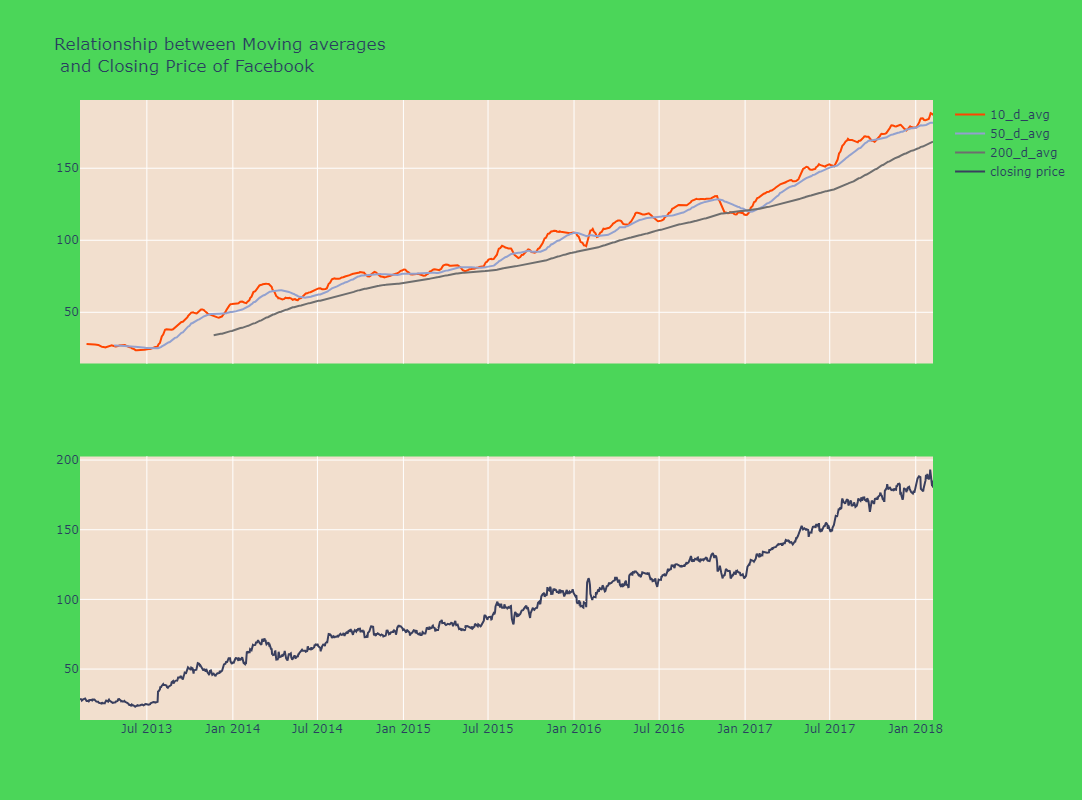

In [ ]:
# plot the MAVs fo FB
mav_chart(fb_dfn)

**Analysis and Interpretation:**

**1.From above stock chart of 'FB' we can observe that 14th Novemeber, 2016 is the first when 10 Days Moving avearge is going down than 50 Days Moving average which shows declining trends**

**2. On 4th January, 2017 10 Days Moving average starts moving above 200 Days Moving average which shows Upwards trend in 'FB' stock**

**3. Over a period of 5 years FB showed upward trend except only one time which was around Dec. 2016, and reason of that decline was FB got into trouble by reports of 'Cambridge analytica Data scandle', thus stock declined in Dec. 2016**


**Moving average chart of 'AAPL'**


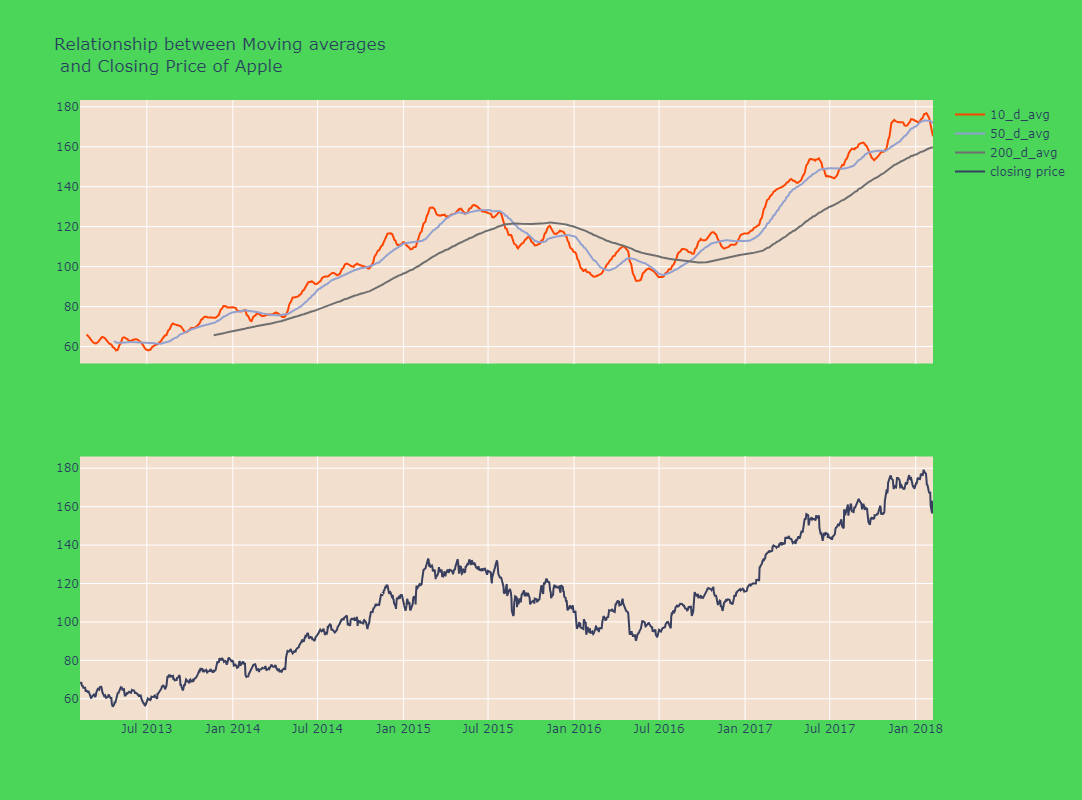

In [ ]:
# plot the MAVs of Apple
mav_chart(aapl_dfn)

### **Correlation Matrix**

In [ ]:
df.corr()

open      high       low     close    volume  daily return  \
open          1.000000  0.999184  0.999177  0.998278 -0.416614     -0.026207   
high          0.999184  1.000000  0.998880  0.999156 -0.405726      0.002519   
low           0.999177  0.998880  1.000000  0.999072 -0.424443      0.001023   
close         0.998278  0.999156  0.999072  1.000000 -0.413584      0.031559   
volume       -0.416614 -0.405726 -0.424443 -0.413584  1.000000      0.059308   
daily return -0.026207  0.002519  0.001023  0.031559  0.059308      1.000000   
daily_mean    0.999550  0.999697  0.999672  0.999518 -0.415236      0.002233   

              daily_mean  
open            0.999550  
high            0.999697  
low             0.999672  
close           0.999518  
volume         -0.415236  
daily return    0.002233  
daily_mean      1.000000

**The output provided appears to be a correlation matrix, showcasing the correlation coefficients between different variables in a dataset. Here's an explanation of the matrix:**

**Each row and column in the matrix corresponds to a variable. The variables in this case are 'open', 'high', 'low', 'close', 'volume', 'daily return', and 'daily_mean'.**

**The values in the matrix represent the correlation coefficients, which measure the strength and direction of the linear relationship between two variables. A correlation coefficient ranges from -1 to 1.**

**For example:**

**The correlation coefficient between 'open' and 'high' is 0.999184, indicating a strong positive correlation, suggesting that when the opening price increases, the high price tends to increase as well.**

**The correlation coefficient between 'volume' and 'daily return' is 0.059308, indicating a weak positive correlation, implying that there is a slight tendency for higher trading volume to be associated with slightly higher daily returns.**

**Overall, the correlation matrix provides insights into the relationships between different variables, helping to understand how they co-vary and potentially impact each other.**

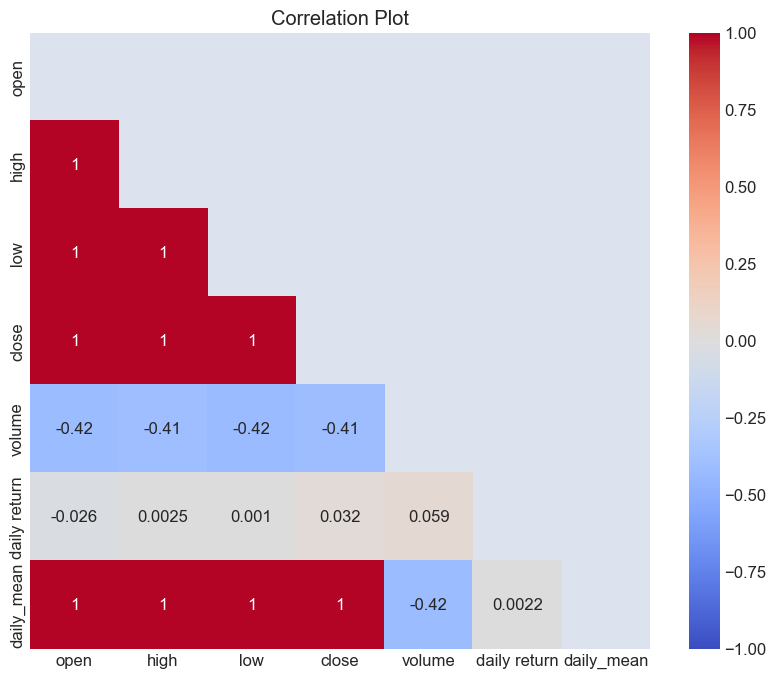

In [ ]:
# ploting the correlation plot 
# Create a mask to hide the upper triangle of the plot (to avoid duplication)
correlation_matrix = df.corr()  
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure and plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Plot')

# Display the plot
plt.show()

In [ ]:
df.head()

date     open   high    low  close    volume ticks  daily return  \
144431 2013-02-08  21.1699  21.30  21.13  21.16  23056853  CSCO     -0.046765   
144432 2013-02-11  21.2400  21.34  21.15  21.27  33551332  CSCO      0.141243   
144433 2013-02-12  21.2500  21.27  20.94  20.97  46456472  CSCO     -1.317647   
144434 2013-02-13  21.0000  21.14  20.93  21.14  63085496  CSCO      0.666667   
144435 2013-02-14  20.8800  21.00  20.51  20.99  67158759  CSCO      0.526820   

        daily_mean co_name  
144431   21.189975   Cisco  
144432   21.250000   Cisco  
144433   21.107500   Cisco  
144434   21.052500   Cisco  
144435   20.845000   Cisco